# STC 510 Module 3 Python Data Transformation Basic
### By Marisa Boyd

For this assignment, we are working with crime stats for the Phoenix area found on Kaggle. The data needs to be imported and explored to make some sense of it. The goal is to think about what useful (and "actionable") data might be of interest here, from the perspective of law enforcement or of residents, and how to group and gather this appropriately.

To start this assignment, the following libraries are imported to be used throughout the analysis of this data.

In [1]:
#Library Import
import pandas as pd

Once the needed libraries are imported, the crime data from Kaggle is imported. But when attempting to import the file using the code below, an error was received, and the import failed.

In [2]:
#Import crimestat csv file
crimestat = pd.read_csv("crimestat (1).csv")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 131677

After googling the error and reading many threads, the following code was run. The file was imported successfully but one line of data was skipped.

In [3]:
#Import crimestat csv file with error_bad_lines=False
crimestat = pd.read_csv("crimestat (1).csv", encoding= "utf8", engine= "python", error_bad_lines=False)

/var/folders/56/2cm42rxn033c_4hqgns4gl5m0000gn/T/ipykernel_7345/3978119381.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crimestat = pd.read_csv("crimestat (1).csv", encoding= "utf8", engine= "python", error_bad_lines=False)
Skipping line 131678: unexpected end of data


In [4]:
#Display first five rows of data in data frame
crimestat.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


Next step is to run multiple lines of code on the data frame to see its shape, information, and various details to determine how to group and analyze the data.

In [5]:
#Display shape of data frame
crimestat.shape

(131676, 7)

In [6]:
#Display dataframe info
crimestat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          131676 non-null  object 
 1   OCCURRED ON         131360 non-null  object 
 2   OCCURRED TO         93174 non-null   object 
 3   UCR CRIME CATEGORY  131676 non-null  object 
 4   100 BLOCK ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


The above code displays the columns of the data frame, the non-null values in each column, and the data type in each column. The INC NUMBER is the primary key for the data frame and is unique to each tuple, which is also seen in the results of the code ran below. The OCCURRED ON column contains 316 null values which means there are multiple incidents that do not of a date. The OCCURRED TO column contains even more null values. The UCR CRIME CATEGORY column and 100 BLOCK ADDR column do not contain any null values. The ZIP column contains 3 null values. The PREMISE TYPE column contains 757 null values. Depending on further analysis, these tuples might be dropped from the data frame.

In [7]:
#Display count of unique values in each feature
crimestat.nunique()

INC NUMBER            131672
OCCURRED ON            83137
OCCURRED TO            66575
UCR CRIME CATEGORY         9
100 BLOCK ADDR         29254
ZIP                       98
PREMISE TYPE              93
dtype: int64

After reviewing the various outputs above, I will focus my analysis on the UCR CRIME CATEGORY, ZIP and OCCURRED ON columns. But, to get a better understanding of each column, the following code was run to see the quantity of values for each unique category.

In [8]:
#Display count for each value in feature (Not Normalized)
crimestat["UCR CRIME CATEGORY"].value_counts()

LARCENY-THEFT                            66216
BURGLARY                                 23647
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR CRIME CATEGORY, dtype: int64

By normalizing the data for the UCR CRIME CATEGORY, we can see that 50% of reported incidence within the data set is Larceny-theft. The lowest reported incident is Murder and Non-negligent manslaughter at 0.2%.

In [9]:
#Display count for each value in feature (Normalized)
crimestat["UCR CRIME CATEGORY"].value_counts(normalize=True)

LARCENY-THEFT                            0.502871
BURGLARY                                 0.179585
MOTOR VEHICLE THEFT                      0.109291
DRUG OFFENSE                             0.072694
AGGRAVATED ASSAULT                       0.070673
ROBBERY                                  0.042832
RAPE                                     0.015045
ARSON                                    0.004815
MURDER AND NON-NEGLIGENT MANSLAUGHTER    0.002195
Name: UCR CRIME CATEGORY, dtype: float64

In [10]:
#Display count for each value in feature (Not Normalized)
crimestat["ZIP"].value_counts()

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 98, dtype: int64

In [11]:
#Display count for each value in feature (Normalized)
crimestat["ZIP"].value_counts(normalize=True)

85015.0    0.052881
85008.0    0.047998
85009.0    0.041869
85041.0    0.041595
85051.0    0.040927
             ...   
85203.0    0.000008
85266.0    0.000008
85381.0    0.000008
85268.0    0.000008
85212.0    0.000008
Name: ZIP, Length: 98, dtype: float64

To get a better understanding of when all these crimes are occurring, the year for each incident is pulled out and placed into its own column.

In [12]:
#Defining a function that will return the year out of the OCCURRED ON column
def year_output(date_object):
    new_date_object = str(date_object)
    return new_date_object[6:10]

In [13]:
#Applying defined function above to dataframe and creating a new column in data frame
crimestat['year'] = crimestat['OCCURRED ON'].apply(year_output)

In [14]:
#Display data frame
crimestat

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,year
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,2015
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,2015
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,2015
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,2015
...,...,...,...,...,...,...,...,...
131671,201700002024419,11/17/2017 04:00,11/17/2017 04:06,BURGLARY,22XX E BROADWAY RD,85040.0,DEPARTMENT / DISCOUNT STORE,2017
131672,201700002027239,11/17/2017 04:15,11/17/2017 04:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE,2017
131673,201700002025582,11/17/2017 05:00,11/17/2017 09:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT,2017
131674,201700002024523,11/17/2017 05:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE,2017


In [15]:
#Display count for each value in feature (Not Normalized)
crimestat["year"].value_counts()

2016    63226
2017    58010
2015    10124
          316
Name: year, dtype: int64

In [16]:
#Display count for each value in feature (Normalized)
crimestat["year"].value_counts(normalize=True)

2016    0.480163
2017    0.440551
2015    0.076886
        0.002400
Name: year, dtype: float64

<AxesSubplot:>

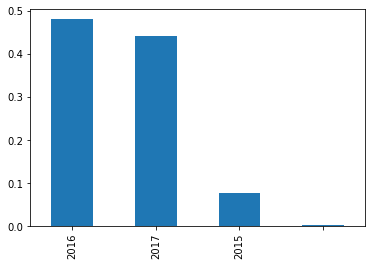

In [17]:
#Display bar graph of count for each value in feature (Normalized)
crimestat["year"].value_counts(normalize=True).plot.bar(sort_columns=True)

There is a lot of null data, this data is being dropped from the data frame and saved into a new data frame.

In [18]:
#Drop null values and save results into new data frame
crimestat_no_null = crimestat.dropna().copy()

In [19]:
#Display data frame information
crimestat_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92351 entries, 0 to 131675
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INC NUMBER          92351 non-null  object 
 1   OCCURRED ON         92351 non-null  object 
 2   OCCURRED TO         92351 non-null  object 
 3   UCR CRIME CATEGORY  92351 non-null  object 
 4   100 BLOCK ADDR      92351 non-null  object 
 5   ZIP                 92351 non-null  float64
 6   PREMISE TYPE        92351 non-null  object 
 7   year                92351 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.3+ MB


In [20]:
#Applying defined function above to dataframe and creating a new column in data frame
crimestat_no_null['year'] = crimestat_no_null['OCCURRED ON'].apply(year_output)

In [21]:
#Display data frame
crimestat_no_null

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,year
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,2015
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,2015
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,2015
5,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT,2015
...,...,...,...,...,...,...,...,...
131670,201700002024346,11/17/2017 03:19,11/17/2017 03:19,DRUG OFFENSE,41XX N 27TH AVE,85017.0,VEHICLE,2017
131671,201700002024419,11/17/2017 04:00,11/17/2017 04:06,BURGLARY,22XX E BROADWAY RD,85040.0,DEPARTMENT / DISCOUNT STORE,2017
131672,201700002027239,11/17/2017 04:15,11/17/2017 04:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE,2017
131673,201700002025582,11/17/2017 05:00,11/17/2017 09:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT,2017


<AxesSubplot:>

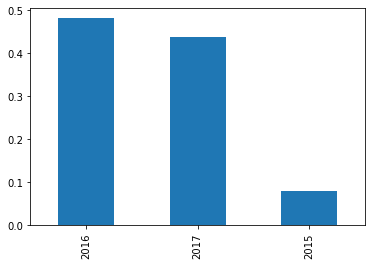

In [22]:
#Display bar graph of count for each value in feature (Normalized)
crimestat_no_null["year"].value_counts(normalize=True).plot.bar(sort_columns=True)

In [23]:
#Group data into a new data frame
crimestat_type_no_null = crimestat_no_null.groupby(['UCR CRIME CATEGORY'])

In [24]:
#Display count for each value in feature (Normalized)
crimestat_type_no_null["year"].value_counts(normalize=True)

UCR CRIME CATEGORY                     year
AGGRAVATED ASSAULT                     2017    0.495458
                                       2016    0.432526
                                       2015    0.072016
ARSON                                  2017    0.456853
                                       2016    0.441624
                                       2015    0.101523
BURGLARY                               2016    0.483056
                                       2017    0.429394
                                       2015    0.087551
DRUG OFFENSE                           2016    0.477955
                                       2017    0.431160
                                       2015    0.090885
LARCENY-THEFT                          2016    0.482652
                                       2017    0.440305
                                       2015    0.077043
MOTOR VEHICLE THEFT                    2016    0.503339
                                       2017    0.412866
    

In [25]:
#Group data into a new data frame
year_crime = crimestat_no_null.groupby(['year'])

In [26]:
#Display count for each value in feature (Not Normalized)
year_crime["UCR CRIME CATEGORY"].value_counts()

year  UCR CRIME CATEGORY                   
2015  LARCENY-THEFT                             3646
      BURGLARY                                  1749
      MOTOR VEHICLE THEFT                       1029
      DRUG OFFENSE                               336
      AGGRAVATED ASSAULT                         333
      ROBBERY                                    194
      RAPE                                        82
      ARSON                                       20
      MURDER AND NON-NEGLIGENT MANSLAUGHTER       18
2016  LARCENY-THEFT                            22841
      BURGLARY                                  9650
      MOTOR VEHICLE THEFT                       6181
      AGGRAVATED ASSAULT                        2000
      DRUG OFFENSE                              1767
      ROBBERY                                   1205
      RAPE                                       667
      ARSON                                       87
      MURDER AND NON-NEGLIGENT MANSLAUGHTER       85
20

In [27]:
#Display count for each value in feature (Normalized)
year_crime["UCR CRIME CATEGORY"].value_counts(normalize=True)

year  UCR CRIME CATEGORY                   
2015  LARCENY-THEFT                            0.492237
      BURGLARY                                 0.236128
      MOTOR VEHICLE THEFT                      0.138923
      DRUG OFFENSE                             0.045362
      AGGRAVATED ASSAULT                       0.044957
      ROBBERY                                  0.026191
      RAPE                                     0.011071
      ARSON                                    0.002700
      MURDER AND NON-NEGLIGENT MANSLAUGHTER    0.002430
2016  LARCENY-THEFT                            0.513477
      BURGLARY                                 0.216937
      MOTOR VEHICLE THEFT                      0.138952
      AGGRAVATED ASSAULT                       0.044961
      DRUG OFFENSE                             0.039723
      ROBBERY                                  0.027089
      RAPE                                     0.014994
      ARSON                                    0.001956
    

In [28]:
#Display count for each value in feature (Not Normalized)
year_crime["ZIP"].value_counts()

year  ZIP    
2015  85015.0    351
      85051.0    348
      85041.0    319
      85008.0    310
      85009.0    301
                ... 
2017  85305.0      1
      85326.0      1
      85337.0      1
      85383.0      1
      85392.0      1
Name: ZIP, Length: 219, dtype: int64

In [29]:
#Group data into a new data frame
zip_crime = crimestat_no_null.groupby(['ZIP'])

In [30]:
#Display count for each value in feature (Not Normalized)
zip_crime["UCR CRIME CATEGORY"].value_counts()

ZIP      UCR CRIME CATEGORY 
85003.0  LARCENY-THEFT          537
         BURGLARY               145
         MOTOR VEHICLE THEFT    105
         DRUG OFFENSE            78
         AGGRAVATED ASSAULT      58
                               ... 
85392.0  AGGRAVATED ASSAULT       1
85395.0  AGGRAVATED ASSAULT       1
85396.0  BURGLARY                 1
         LARCENY-THEFT            1
         MOTOR VEHICLE THEFT      1
Name: UCR CRIME CATEGORY, Length: 523, dtype: int64

<AxesSubplot:>

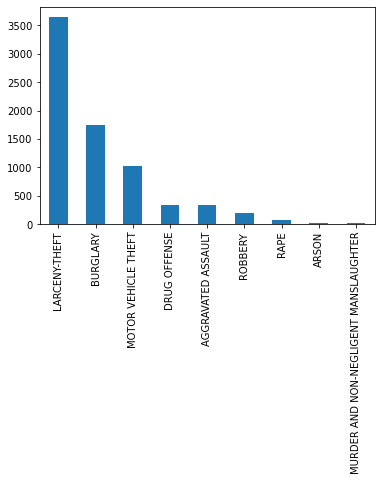

In [31]:
crimestat_no_null[crimestat_no_null.year=='2015']['UCR CRIME CATEGORY'].value_counts().plot.bar()

<AxesSubplot:>

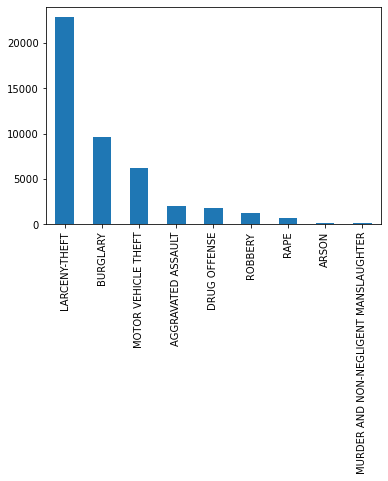

In [32]:
crimestat_no_null[crimestat_no_null.year=='2016']['UCR CRIME CATEGORY'].value_counts().plot.bar()

<AxesSubplot:>

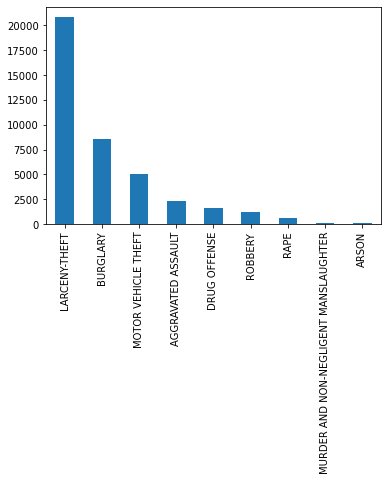

In [33]:
crimestat_no_null[crimestat_no_null.year=='2017']['UCR CRIME CATEGORY'].value_counts().plot.bar()

<AxesSubplot:>

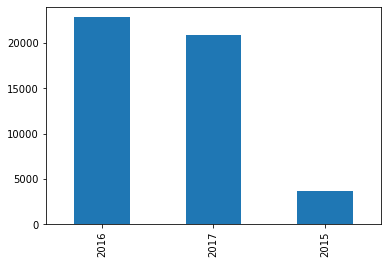

In [34]:
crimestat_no_null[crimestat_no_null['UCR CRIME CATEGORY']=='LARCENY-THEFT'].year.value_counts().plot.bar()

After reviewing all the data in the code above, the largest thing that was observed is the incease in incedences from 2015 to 2016/2017. 